In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import time
import pandas_datareader.data as web

In [52]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 7, 31)
AAPL = web.DataReader('AAPL', 'stooq', start, end)

In [53]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-31,196.06,196.490,195.260,196.45,38824113.0
2023-07-28,194.67,196.626,194.140,195.83,48291443.0
2023-07-27,196.02,197.200,192.550,193.22,47460180.0
2023-07-26,193.67,195.640,193.320,194.50,47471868.0
2023-07-25,193.33,194.440,192.915,193.62,37283201.0


In [54]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,3416.000000,3416.000000,3416.000000,3416.000000,3.416000e+03
mean,54.310555,54.913882,53.737467,54.351501,2.780028e+08
std,52.350339,52.987414,51.772284,52.410428,2.625482e+08
min,5.863010,5.966800,5.791530,5.846470,3.145820e+07
25%,16.955550,17.087650,16.758900,16.876000,9.826786e+07
50%,28.612700,28.821100,28.418400,28.598300,1.665088e+08
75%,72.072875,73.559400,70.818000,72.009125,3.825379e+08
max,196.060000,198.230000,195.260000,196.450000,2.184248e+09


Staitionarity

ADF Test
Augmented Dickey Fuller: If p value <0.05, then the timeseries is stationary

If p value>0.05, we need to find the order of indexing

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
result = adfuller(AAPL.Close.dropna())
print(f'ADF Statistic : {result[0]}')
print(f'p-value : {result[1]}')

ADF Statistic : -2.7701131926019844
p-value : 0.06267132965519467


Autocorrelation Function (ACF)

In [57]:
from statsmodels.graphics.tsaplots import plot_acf

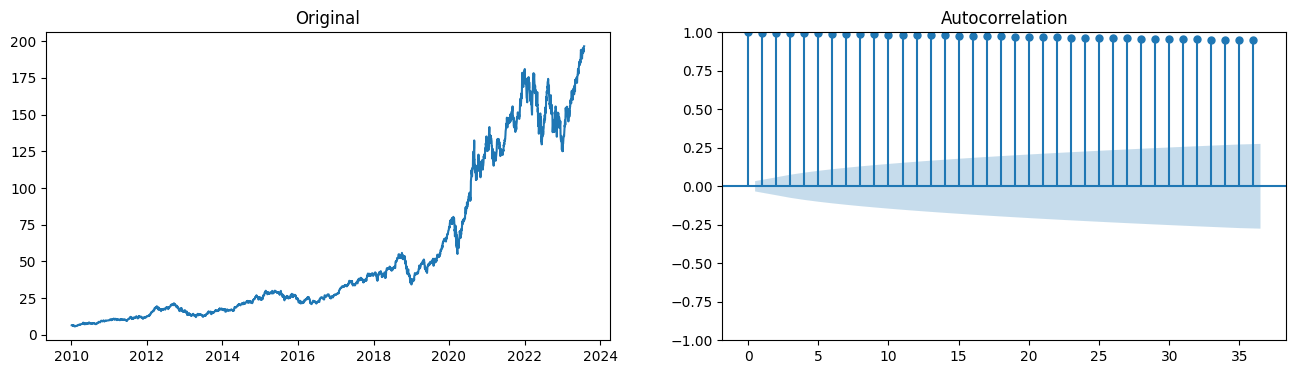

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(AAPL.Close)
ax1.set_title('Original')
plot_acf(AAPL.Close, ax=ax2);

## ; to plot only once

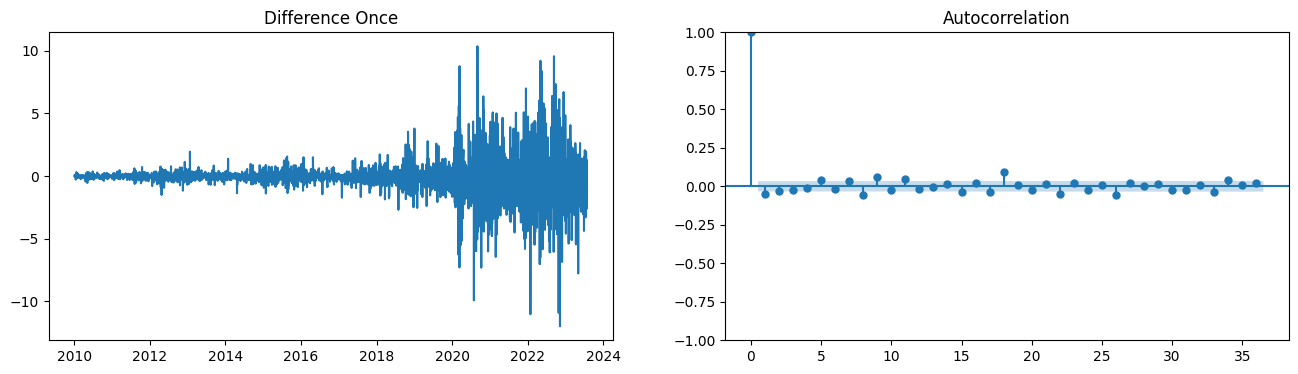

In [59]:
diff = AAPL.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff, ax=ax2);

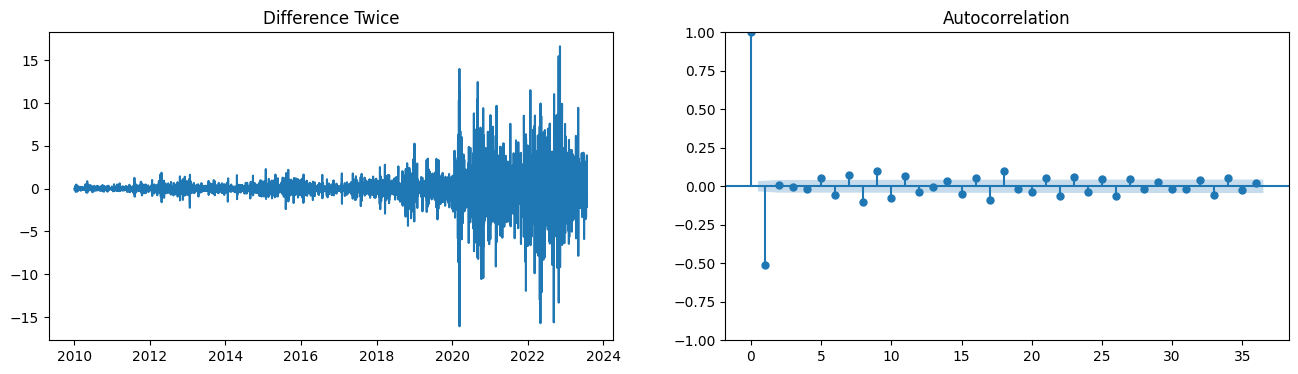

In [60]:
diff = AAPL.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(diff, ax=ax2);

Use the pmdarima package

In [61]:
from pmdarima.arima.utils import ndiffs

In [62]:
ndiffs(AAPL.Close, test = 'adf')

1

<h4><b>p</b></h4>
p is the order of the AutoRegressive (AR) term. It refers to the number of lags to be used as the predictors
We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) Plot.
The PACF represents correlation between series and lags

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf

(0.0, 1.0)

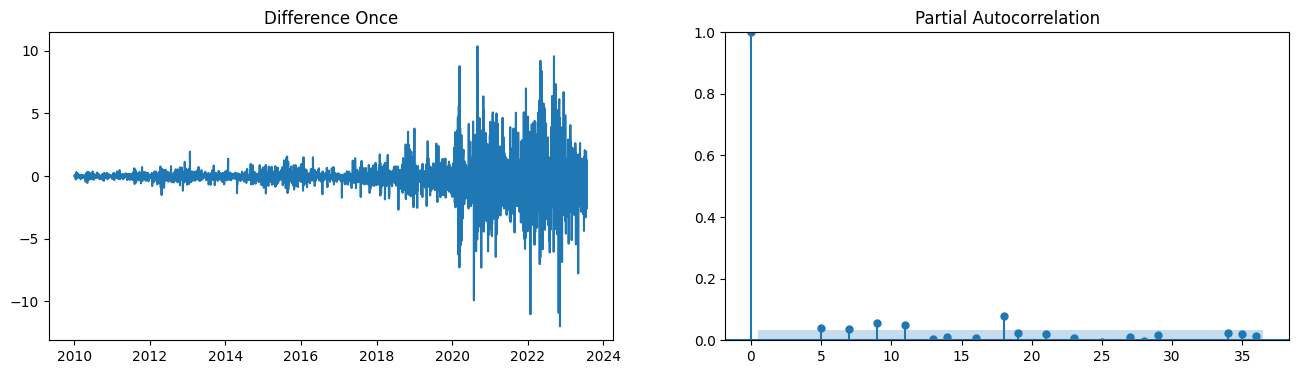

In [64]:
diff = AAPL.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_pacf(diff, ax=ax2);
ax2.set_ylim(0,1)

Some data stands out as it is above the significance line, can use those datas as the p term

<h4><b>q</b></h4>
q is the order of the moving average (MA) term. It refers to the lagged forecast errors that should go into the ARIMA model. We can look at the ACF plot

(0.0, 1.0)

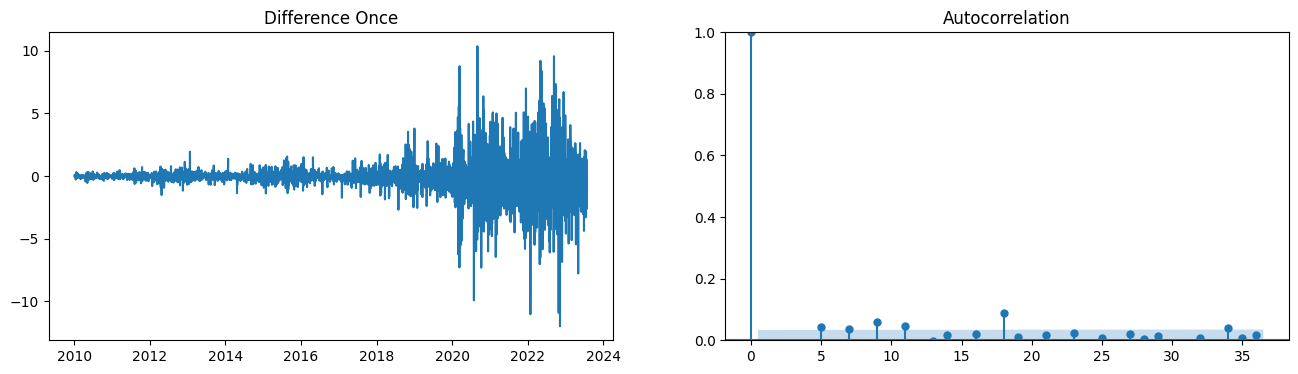

In [65]:
diff = AAPL.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff, ax=ax2);
ax2.set_ylim(0,1)

18 may be suitable

<b>Fitting the ARIMA model

In [66]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
model = ARIMA(AAPL.Close, order=(6,1,3))
result = model.fit()

c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but 

In [68]:
print(result.summary()) ##Good = low p value and low coef

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3416
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -6032.479
Date:                Mon, 07 Aug 2023   AIC                          12084.959
Time:                        23:08:55   BIC                          12146.318
Sample:                             0   HQIC                         12106.884
                               - 3416                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0597      0.044      1.346      0.178      -0.027       0.147
ar.L2         -0.0626      0.040     -1.561      0.119      -0.141       0.016
ar.L3         -0.8466      0.039    -21.762      0.0

(-10.0, 10.0)

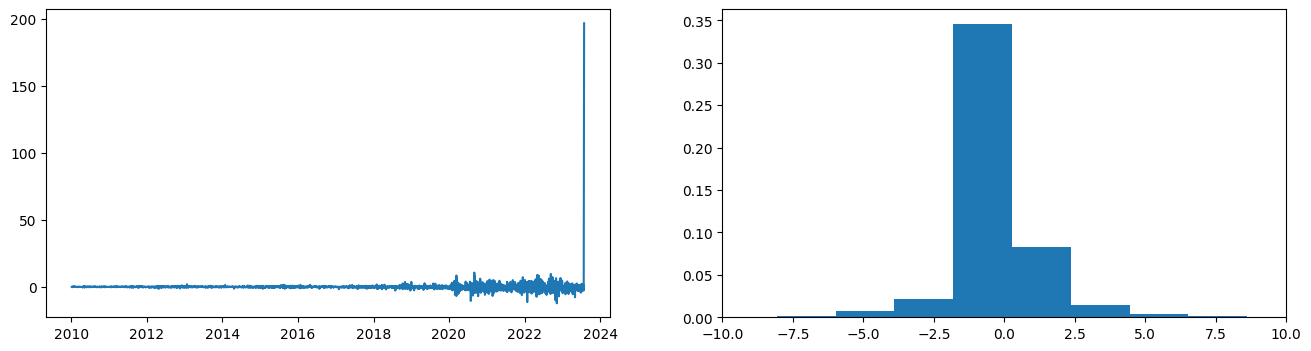

In [69]:
residuals = pd.DataFrame(result.resid)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(residuals)
ax2.hist(residuals, density = True, bins=100)
ax2.set_xlim(-10,10)

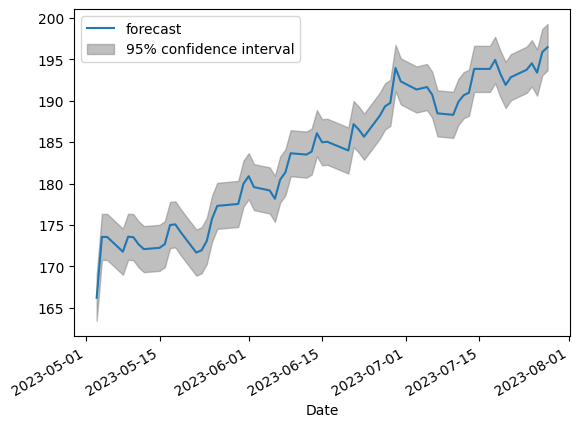

In [70]:
#Actual vs fitted
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result, start=1, end=60);

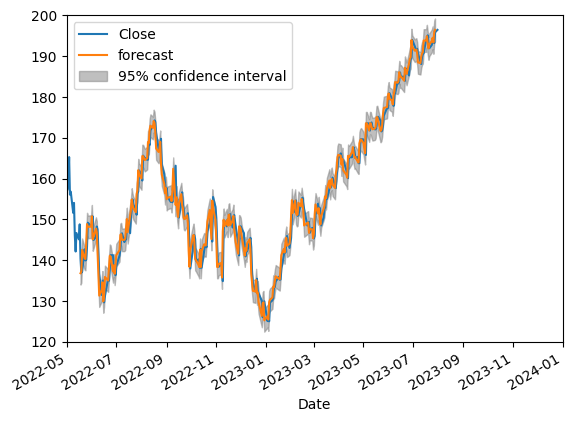

In [71]:
fig, ax = plt.subplots()
ax = AAPL['Close'].plot(ax=ax)
plot_predict(result, start = 1, end = 300, ax=ax)
ax.set_xlim([datetime.date(2022, 5, 1), datetime.date(2024, 1, 1)])
ax.set_ylim(120,200)
plt.show()

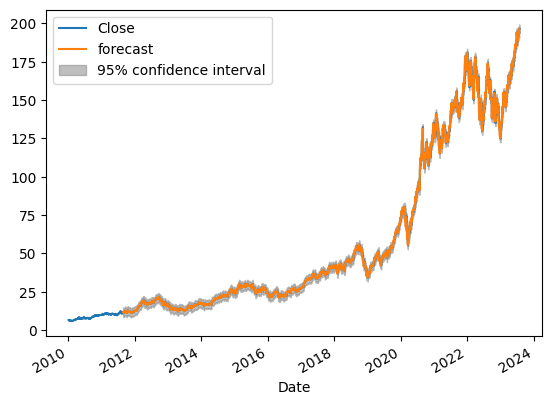

In [72]:
fig, ax = plt.subplots()
ax = AAPL['Close'].plot(ax=ax)
plot_predict(result, start = 1, end = 3000, ax=ax)
plt.show()

In [73]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,3416.000000,3416.000000,3416.000000,3416.000000,3.416000e+03
mean,54.310555,54.913882,53.737467,54.351501,2.780028e+08
std,52.350339,52.987414,51.772284,52.410428,2.625482e+08
min,5.863010,5.966800,5.791530,5.846470,3.145820e+07
25%,16.955550,17.087650,16.758900,16.876000,9.826786e+07
50%,28.612700,28.821100,28.418400,28.598300,1.665088e+08
75%,72.072875,73.559400,70.818000,72.009125,3.825379e+08
max,196.060000,198.230000,195.260000,196.450000,2.184248e+09


In [74]:
df = AAPL[['Close']].copy()

In [75]:
df.describe()

,Close
count,3416.000000
mean,54.351501
std,52.410428
min,5.846470
25%,16.876000
50%,28.598300
75%,72.009125
max,196.450000


In [76]:
df.head()

,Close
Date,
2023-07-31,196.45
2023-07-28,195.83
2023-07-27,193.22
2023-07-26,194.50
2023-07-25,193.62


In [77]:
df = df[['Close']].copy()

In [78]:
df.head()

,Close
Date,
2023-07-31,196.45
2023-07-28,195.83
2023-07-27,193.22
2023-07-26,194.50
2023-07-25,193.62


In [79]:
n = int(len(df)*0.8)
train = df.Close[:n]
test = df.Close[n:]

In [80]:
print(len(train))
print(len(test))

2732
684


In [81]:
model = ARIMA(train, order=(6,1,3))
fitted = model.fit()

c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but 

c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2732
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -5122.749
Date:                Mon, 07 Aug 2023   AIC                          10265.497
Time:                        23:08:58   BIC                          10324.622
Sample:                             0   HQIC                         10286.866
                               - 2732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4063      0.054      7.513      0.000       0.300       0.512
ar.L2          0.2607      0.050      5.179      0.000       0.162       0.359
ar.L3         -0.7858      0.052    -15.085      0.000      -0.888      -0.684
ar.L4         -0.0362      0.013     -2.757      0.006      -0.062      -0.010
ar.L5          0.0302      0.013      2.407      0.016       0.006       0.055
ar.L6         -0.0752      0.012     -6.128      0.000      -0.099      -0.051
ma.L1         -0.4558      0.053     -8.540      0.000      -0.560      -0.351
ma.L2         -0.2832      0.050     -5.616      0.000      -0.382      -0.184
ma.L3          0.7971      0.051     15.724      0.000       0.698       0.896
sigma2         2.4891      0.029     85.641      0.000       2.432       2.546
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9763.51
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
step=600
result = fitted.get_forecast(step, alpha =0.05).summary_frame()
result.head()

c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Theodore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Close,mean,mean_se,mean_ci_lower,mean_ci_upper
2732,21.469506,1.577675,18.377319,24.561693
2733,21.457698,2.176602,17.191637,25.723759
2734,21.449294,2.605559,16.342492,26.556096
2735,21.414106,2.958992,15.614588,27.213624
2736,21.413026,3.263686,15.016319,27.809734


In [84]:
fc_series = pd.Series(result['mean'].values, index=test[:step].index)
lower_series = pd.Series(result['mean_ci_lower'].values, index=test[:step].index)
upper_series = pd.Series(result['mean_ci_upper'].values, index=test[:step].index)

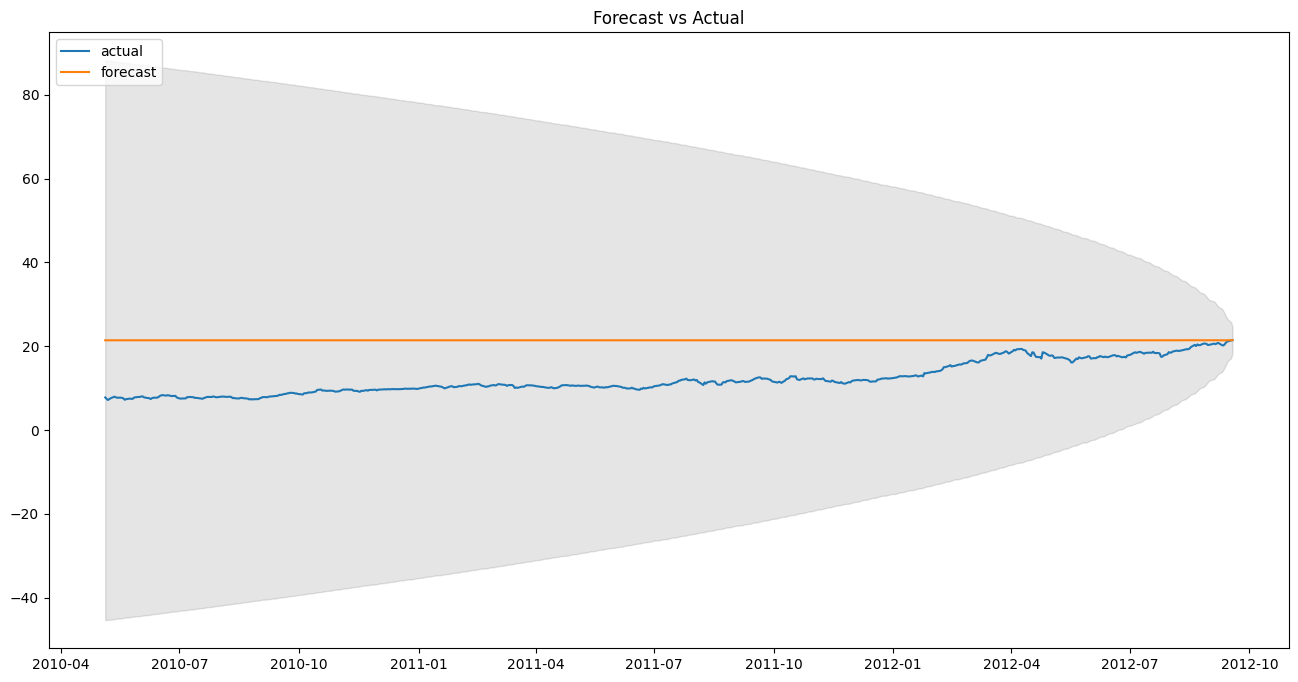

In [85]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha =0.1)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left')